In [9]:
#creating dataset of classification
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [10]:
import matplotlib.pyplot as plt

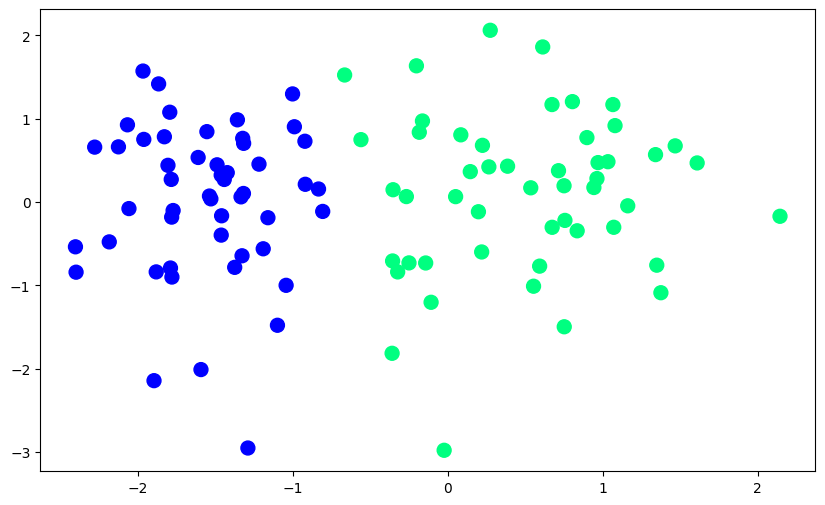

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [12]:
#aplying the percetron trick and updating coef_
def perceptron(X,y):
    # adding Xo(1) to the data for simplification(copy follow)
    X = np.insert(X,0,1,axis=1)
    # weight is an array  and all element are 1
    weights = np.ones(X.shape[1])
    # learning rate
    lr = 0.1

    for i in range(1000):
      # random student lekar uske upar apply karenge
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        #updating weight
        weights = weights + lr*(y[j]-y_hat)*X[j]

    #returning weight[0] as intercept and weight[1:] as coefficient

    return weights[0],weights[1:]

In [14]:

intercept_,coef_ = perceptron(X,y)

In [15]:

print(coef_)
print(intercept_)



[1.42271952 0.0629855 ]
0.9


In [16]:
# finding m=-A/B and b=-C/B from AX+BY+C=0
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [17]:

x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

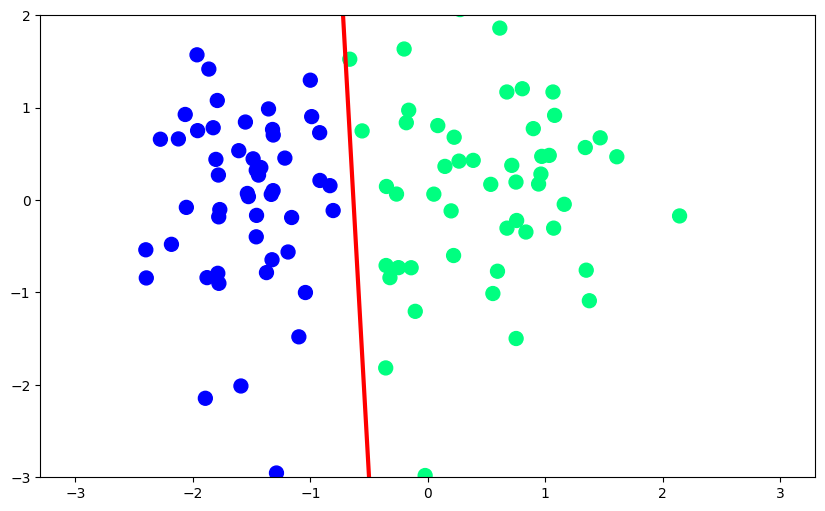

In [18]:
#drawing line
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

#  Solution via Scikit Learn

In [19]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [20]:
#calxulating m and b of lor model
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

(-3.0, 2.0)

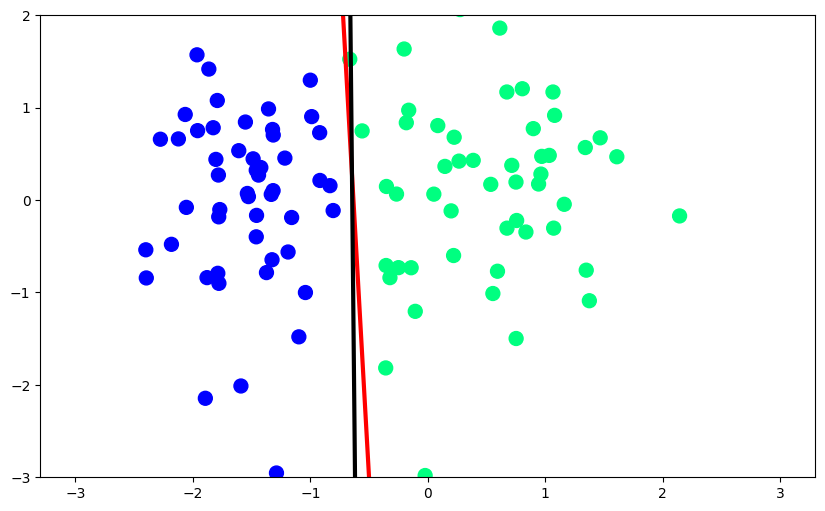

In [21]:
#plotting line comes form lor(scikt learn)

x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)# class line
plt.plot(x_input1,y_input1,color='black',linewidth=3)#scikit learn line
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

Both line are not overlapping means Scikit learn performing diffrent from our class,  (scikit is better than ours class , scikit learn separates more symmetrically)